**Part 1**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#simple free-fall algebraic equation 
d = 4e3 #m
g0 = 9.81 #m/s^2
t = np.sqrt(2*d/(g0))
print(t)

28.55686245854129


  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  3.030e-01 ...  2.818e+01  2.848e+01]
        y: [[ 4.000e+03  4.000e+03 ...  1.044e+02  2.015e+01]
            [ 0.000e+00 -2.973e+00 ... -2.765e+02 -2.794e+02]]
      sol: None
 t_events: [array([ 2.856e+01])]
 y_events: [array([[ 0.000e+00, -2.801e+02]])]
     nfev: 44
     njev: 0
      nlu: 0
It stopped at t=28.48, this is very close to the value I calculated. There is a differnce of 0.07 s.


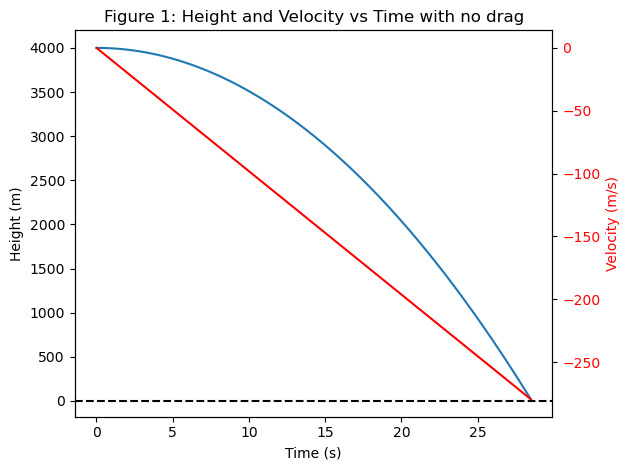

In [2]:
#solve eqn using solve_ivp
alpha = 0
gamma = 2
#thing 1 derivatives
def derivatives(t,s):
    y, v = s
    dydt = v
    dvdt = -g0 - alpha*v**gamma
    return [dydt, dvdt]

# thing 2: time span
t0, tf = (0,30)
t_eval = np.linspace(t0, tf, 100)
#thing 3: intial conditions
y0 = [d,0]

#thing 4: stopping condition
def stopping(t, s):
    return s[0] - 0

stopping.terminal = True
#solve
soln = solve_ivp(fun = derivatives, t_span = (t0, tf), y0 = y0, t_eval = t_eval, events=stopping)
print(soln)
print("It stopped at t=28.48, this is very close to the value I calculated. There is a differnce of 0.07 s.")
#plot
t = soln.t
y = soln.y[0]
v = soln.y[1]

fig, ax = plt.subplots(1,)
ax.plot(t, y, label="Height")
ax.set_ylabel("Height (m)")
ax.set_xlabel("Time (s)")
ax2 = ax.twinx()
ax2.plot(t, v, color = "red", label="Velocity")
ax2.set_ylabel("Velocity (m/s)", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax.set_title("Figure 1: Height and Velocity vs Time with no drag")
ax.axhline(0.0, linestyle="--", color='black')

fig.tight_layout()

**Part 2**

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  1.502e+00 ...  2.703e+01  2.853e+01]
        y: [[ 4.000e+03  3.989e+03 ...  4.174e+02  8.353e+00]
            [ 0.000e+00 -1.473e+01 ... -2.651e+02 -2.798e+02]]
      sol: None
 t_events: [array([ 2.856e+01])]
 y_events: [array([[-9.095e-13, -2.801e+02]])]
     nfev: 44
     njev: 0
      nlu: 0
Having a dependence of gravity increased the fall time by 0.05


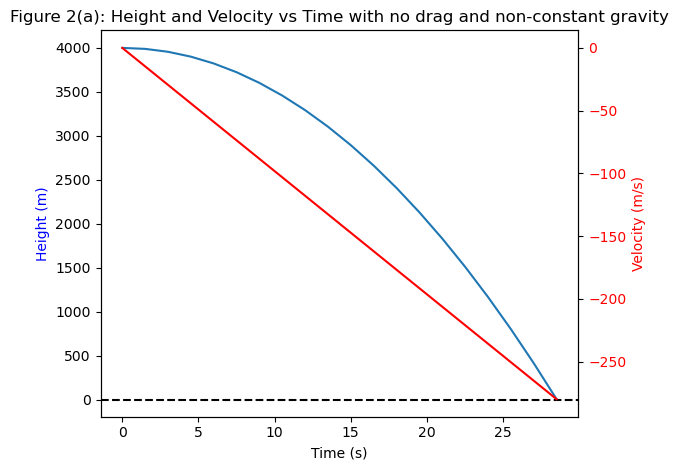

In [3]:
g0 = 9.81
R = 6378.1e3
alpha = 0
gamma = 2
d = 4e3
#solve eqn using solve_ivp
alpha = 0
gamma = 2
#thing 1 derivatives

def derivatives(t,s):
    y, v = s
    r = R - d + y
    dydt = v
    g = g0 * (r / R)
    dvdt = -g - alpha * v**gamma
    return [dydt, dvdt]

# thing 2: time span
t0, tf = (0,1500)
t_eval = np.linspace(t0, tf, 1000)
#thing 3: intial conditions
y0 = [d,0]

def hit_bottom(t, s):
    y, v = s
    return y
hit_bottom.terminal = True
hit_bottom.direction = -1

#solve
soln = solve_ivp(fun = derivatives, t_span = (t0, tf), y0 = y0, t_eval = t_eval, events=hit_bottom)
print(soln)

#plot
t = soln.t
y = soln.y[0]
v = soln.y[1]

fig, ax = plt.subplots(1,)
#plot before drag is added
ax.plot(t, y, label="Height")
ax.set_ylabel("Height (m)", color="blue")
ax.set_xlabel("Time (s)")
ax2 = ax.twinx()
ax2.plot(t, v, color = "red", label="Velocity")
ax2.set_ylabel("Velocity (m/s)", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax.set_title("Figure 2(a): Height and Velocity vs Time with no drag and non-constant gravity")
ax.axhline(0.0, linestyle="--", color='black')
fig.tight_layout()
print("Having a dependence of gravity increased the fall time by 0.05")

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  1.502e+00 ...  8.258e+01  8.408e+01]
        y: [[ 4.000e+03  3.989e+03 ...  8.403e+01  9.633e+00]
            [ 0.000e+00 -1.431e+01 ... -4.948e+01 -4.946e+01]]
      sol: None
 t_events: [array([ 8.428e+01])]
 y_events: [array([[-4.547e-13, -4.946e+01]])]
     nfev: 128
     njev: 0
      nlu: 0
Alpha was calibrated by guess and check until the final velocity was around 50 m/s. Adding drag increased our fall time by about 56 seconds


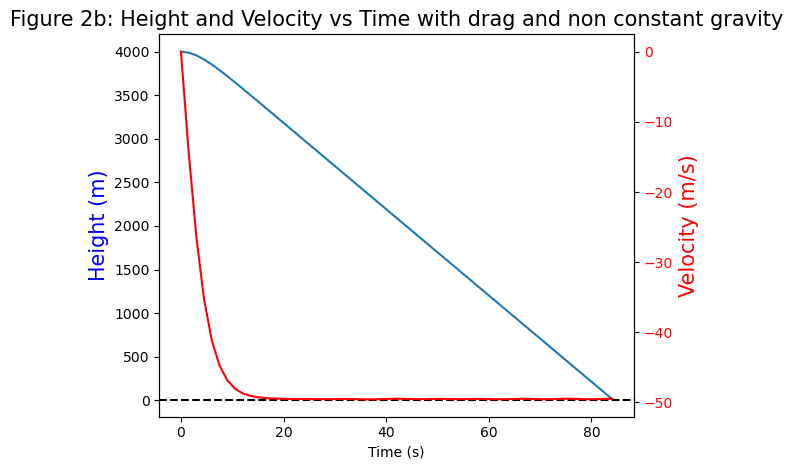

In [4]:
g0 = 9.81
R = 6378.1e3
alpha = 0.004
gamma = 2
d = 4e3
#solve eqn using solve_ivp
#thing 1 derivatives

def derivatives(t,s):
    y, v = s
    r = R - d + y
    dydt = v
    g = g0 * (r / R)
    dvdt = -g + alpha * np.abs(v)**gamma
    return [dydt, dvdt]

# thing 2: time span
t0, tf = (0,1500)
t_eval = np.linspace(t0, tf, 1000)
#thing 3: intial conditions
y0 = [d,0]

def hit_bottom(t, s):
    y, v = s
    return y
hit_bottom.terminal = True
hit_bottom.direction = -1

#solve
soln = solve_ivp(fun = derivatives, t_span = (t0, tf), y0 = y0, t_eval = t_eval, events=hit_bottom)
print(soln)

#plot
t = soln.t
y = soln.y[0]
v = soln.y[1]

fig, ax = plt.subplots(1,)

ax.plot(t, y, label="Height")
ax.set_ylabel("Height (m)", color="blue", fontsize=15)
ax.set_xlabel("Time (s)")
ax2 = ax.twinx()
ax2.plot(t, v, color = "red", label="Velocity")
ax2.set_ylabel("Velocity (m/s)", color="red", fontsize=15)
ax2.tick_params(axis="y", labelcolor="red")
ax.set_title("Figure 2b: Height and Velocity vs Time with drag and non constant gravity",fontsize=15)
ax.axhline(0.0, linestyle="--", color='black')
fig.tight_layout()
print("Alpha was calibrated by guess and check until the final velocity was around 50 m/s. Adding drag increased our fall time by about 56 seconds")

**Part 3**

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  2.002e-01 ...  2.823e+01  2.843e+01]
        y: [[ 2.500e+00  2.500e+00 ... -2.848e+00 -2.962e+00]
            [ 4.000e+03  4.000e+03 ...  9.194e+01  3.632e+01]
            [ 0.000e+00 -2.859e-05 ... -5.684e-01 -5.765e-01]
            [ 0.000e+00 -1.964e+00 ... -2.769e+02 -2.788e+02]]
      sol: None
 t_events: [array([ 2.856e+01])]
 y_events: [array([[-3.038e+00,  9.095e-13, -5.818e-01, -2.801e+02]])]
     nfev: 44
     njev: 0
      nlu: 0
The test mass bumps into the wall before it hits the bottom


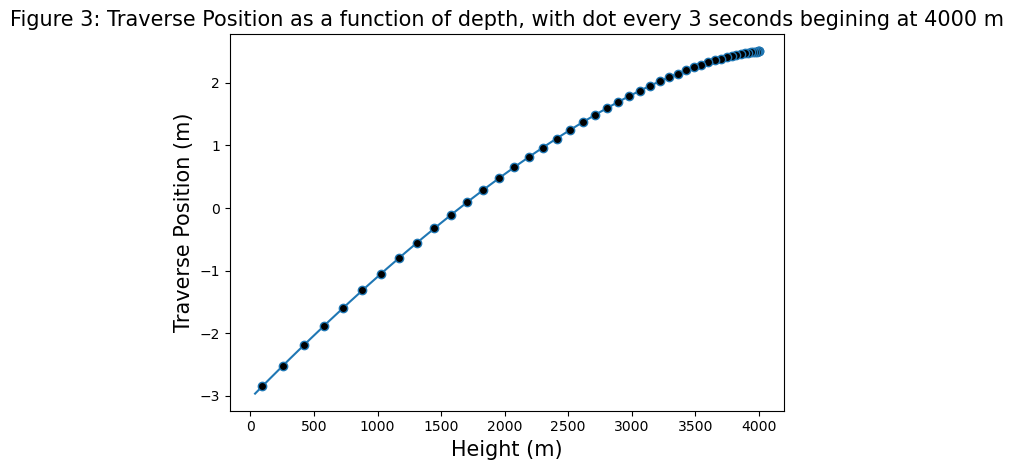

In [5]:
omega = 7.272e-5
def derivatives(t,s):
    x, y, vx, vy = s
    dydt = vy
    dxdt = vx
    r = R - d + y
    g = g0 * (r / R)
    ax = 2*omega*vy
    ay = -g - 2*omega*vx
    return [dxdt, dydt, ax, ay]

# thing 2: time span
t0, tf = (0,200)
t_eval = np.linspace(t0, tf, 1000)


def hit_bottom(t, s):
    x, y, vx, vy = s
    return y
    
hit_bottom.terminal = True
hit_bottom.direction = -1

#thing 3: intial conditions
y0 = [2.5, d, 0, 0]

#solve
soln = solve_ivp(fun = derivatives, t_span = (t0, tf), y0 = y0, t_eval = t_eval, events=hit_bottom)
print(soln)

#plot
t = soln.t
x = soln.y[0]
y = soln.y[1]
vx = soln.y[2]
vy = soln.y[3]

fig, ax = plt.subplots(1,)

ax.plot(y, x, label="Height", marker="o", markevery=3, mfc='black')
ax.set_ylabel("Traverse Position (m)", fontsize=15)
ax.set_xlabel("Height (m)",fontsize=15)
ax.set_title("Figure 3: Traverse Position as a function of depth, with dot every 3 seconds begining at 4000 m", fontsize=15)
fig.tight_layout()
print('The test mass bumps into the wall before it hits the bottom')

In [6]:
omega = 7.272e-5
def derivatives(t,s):
    x, y, vx, vy = s
    dydt = vy
    dxdt = vx
    r = R - d + y
    g = g0 * (r / R)
    ax = 2*omega*vy
    ay = -g + alpha*np.abs(dydt)**gamma- 2*omega*vx
    return [dxdt, dydt, ax, ay]

# thing 2: time span
t0, tf = (0,200)
t_eval = np.linspace(t0, tf, 1000)


def hit_side(t, s):
    x, y, vx, vy = s
    return x
    
hit_side.terminal = True
hit_side.direction = 0

#thing 3: intial conditions
y0 = [2.5, d, 0, 0]

#solve
soln = solve_ivp(fun = derivatives, t_span = (t0, tf), y0 = y0, t_eval = t_eval, events=hit_side)
print(soln)

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  2.002e-01 ...  2.943e+01  2.963e+01]
        y: [[ 2.500e+00  2.500e+00 ...  4.701e-02  9.467e-03]
            [ 4.000e+03  4.000e+03 ...  2.716e+03  2.706e+03]
            [ 0.000e+00 -2.859e-05 ... -1.868e-01 -1.882e-01]
            [ 0.000e+00 -1.963e+00 ... -4.951e+01 -4.951e+01]]
      sol: None
 t_events: [array([ 2.968e+01])]
 y_events: [array([[-8.327e-17,  2.703e+03, -1.886e-01, -4.951e+01]])]
     nfev: 80
     njev: 0
      nlu: 0


  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  2.002e-01 ...  8.388e+01  8.408e+01]
        y: [[ 2.500e+00  2.500e+00 ... -2.080e+01 -2.092e+01]
            [ 4.000e+03  4.000e+03 ...  1.966e+01  9.757e+00]
            [ 0.000e+00 -2.859e-05 ... -5.789e-01 -5.803e-01]
            [ 0.000e+00 -1.963e+00 ... -4.953e+01 -4.953e+01]]
      sol: None
 t_events: [array([ 8.428e+01])]
 y_events: [array([[-2.103e+01, -2.842e-14, -5.818e-01, -4.953e+01]])]
     nfev: 122
     njev: 0
      nlu: 0
The mass would still hit the wall before it hits the bottom, but it would hit the wall later


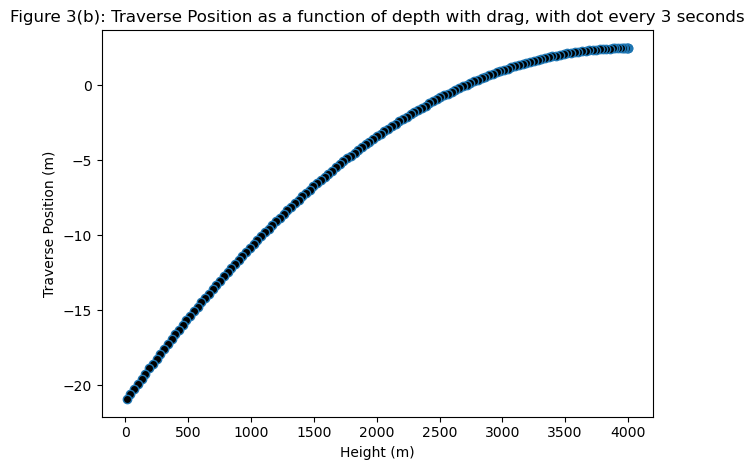

In [7]:
omega = 7.272e-5
def derivatives(t,s):
    x, y, vx, vy = s
    dydt = vy
    dxdt = vx
    r = R - d + y
    g = g0 * (r / R)
    ax = 2*omega*vy
    ay = -g + alpha*np.abs(dydt)**gamma- 2*omega*vx
    return [dxdt, dydt, ax, ay]

# thing 2: time span
t0, tf = (0,200)
t_eval = np.linspace(t0, tf, 1000)


def hit_bottom(t, s):
    x, y, vx, vy = s
    return y
    
hit_bottom.terminal = True
hit_bottom.direction = -1

#thing 3: intial conditions
y0 = [2.5, d, 0, 0]

#solve
soln = solve_ivp(fun = derivatives, t_span = (t0, tf), y0 = y0, t_eval = t_eval, events=hit_bottom)
print(soln)

#plot
t = soln.t
x = soln.y[0]
y = soln.y[1]
vx = soln.y[2]
vy = soln.y[3]

fig, ax = plt.subplots(1,)

ax.plot(y, x, label="Height", marker="o", markevery=3, mfc='black')
ax.set_ylabel("Traverse Position (m)")
ax.set_xlabel("Height (m)")
ax.set_title("Figure 3(b): Traverse Position as a function of depth with drag, with dot every 3 seconds")
fig.tight_layout()
print('The mass would still hit the wall before it hits the bottom, but it would hit the wall later')

In [8]:
omega = 7.272e-5
def derivatives(t,s):
    x, y, vx, vy = s
    dydt = vy
    dxdt = vx
    r = R - d + y
    g = g0 * (r / R)
    ax = 2*omega*vy
    ay = -g + alpha*np.abs(dydt)**gamma- 2*omega*vx
    return [dxdt, dydt, ax, ay]

# thing 2: time span
t0, tf = (0,200)
t_eval = np.linspace(t0, tf, 1000)


def hit_side(t, s):
    x, y, vx, vy = s
    return x
    
hit_side.terminal = True
hit_side.direction = 0

#thing 3: intial conditions
y0 = [2.5, d, 0, 0]

#solve
soln = solve_ivp(fun = derivatives, t_span = (t0, tf), y0 = y0, t_eval = t_eval, events=hit_side)
print(soln)

#plot
t = soln.t
x = soln.y[0]
y = soln.y[1]
vx = soln.y[2]
vy = soln.y[3]

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  2.002e-01 ...  2.943e+01  2.963e+01]
        y: [[ 2.500e+00  2.500e+00 ...  4.701e-02  9.467e-03]
            [ 4.000e+03  4.000e+03 ...  2.716e+03  2.706e+03]
            [ 0.000e+00 -2.859e-05 ... -1.868e-01 -1.882e-01]
            [ 0.000e+00 -1.963e+00 ... -4.951e+01 -4.951e+01]]
      sol: None
 t_events: [array([ 2.968e+01])]
 y_events: [array([[-8.327e-17,  2.703e+03, -1.886e-01, -4.951e+01]])]
     nfev: 80
     njev: 0
      nlu: 0


**Part 4**

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  4.000e+00 ...  2.188e+03  2.192e+03]
        y: [[ 4.000e+03  3.922e+03 ... -1.218e+07 -1.219e+07]
            [ 0.000e+00 -3.924e+01 ... -3.277e+03 -3.241e+03]]
      sol: None
 t_events: [array([ 2.195e+03])]
 y_events: [array([[-1.220e+07, -3.219e+03]])]
     nfev: 62
     njev: 0
      nlu: 0
Velocity decreases expontielly and position is increasing in the downward direction


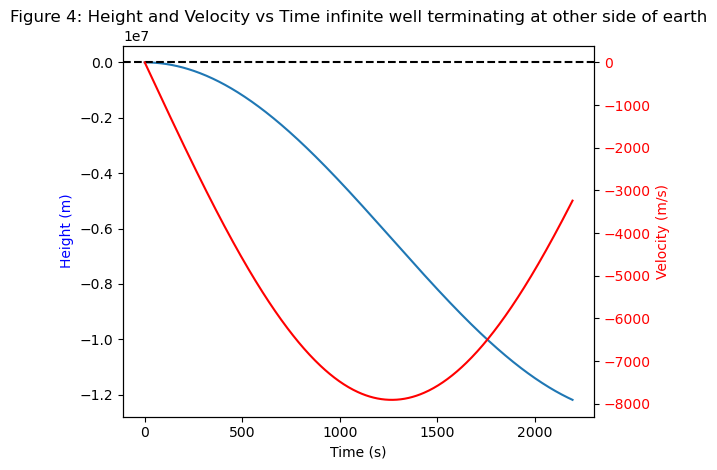

In [9]:
g0 = 9.81
R = 6378.1e3
alpha = 0.004
gamma = 2
d = 4e3
#solve eqn using solve_ivp
#thing 1 derivatives

def derivatives(t,s):
    y, v = s
    r = R - d + y
    dydt = v
    g = g0 * (r / R)
    dvdt = -g
    return [dydt, dvdt]

# thing 2: time span
t0, tf = (0,40000)
t_eval = np.linspace(t0, tf, 10000)
#thing 3: intial conditions
y0 = [d,0]

def hit_bottom(t, s):
    y, v = s
    return s[0] + 1.22e7
hit_bottom.terminal = True
hit_bottom.direction = -1

#solve
soln = solve_ivp(fun = derivatives, t_span = (t0, tf), y0 = y0, t_eval = t_eval, events=hit_bottom)
print(soln)

#plot
t = soln.t
y = soln.y[0]
v = soln.y[1]

fig, ax = plt.subplots(1,)

ax.plot(t, y, label="Height")
ax.set_ylabel("Height (m)", color="blue")
ax.set_xlabel("Time (s)")
ax2 = ax.twinx()
ax2.plot(t, v, color = "red", label="Velocity")
ax2.set_ylabel("Velocity (m/s)", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax.set_title("Figure 4: Height and Velocity vs Time infinite well terminating at other side of earth")
ax.axhline(0.0, linestyle="--", color='black')
fig.tight_layout()
print('Velocity decreases expontielly and position is increasing in the downward direction') 

In [10]:
print("The objects hits the other side of the earth at approximetly time = 2.195e+03 s when it hits 2*R.")
print("The object reaches the center at time 1.267e+03 s when it reaches R. It is at speed 7.910e+03 m/s at the center of the earth.")

The objects hits the other side of the earth at approximetly time = 2.195e+03 s when it hits 2*R.
The object reaches the center at time 1.267e+03 s when it reaches R. It is at speed 7.910e+03 m/s at the center of the earth.


  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  4.000e-01 ...  1.267e+03  1.267e+03]
        y: [[ 4.000e+03  3.999e+03 ... -6.375e+06 -6.378e+06]
            [ 0.000e+00 -3.924e+00 ... -7.911e+03 -7.910e+03]]
      sol: None
 t_events: [array([ 1.267e+03])]
 y_events: [array([[-6.378e+06, -7.910e+03]])]
     nfev: 56
     njev: 0
      nlu: 0
Velocity decreases expontielly and position is increasing in the downward direction


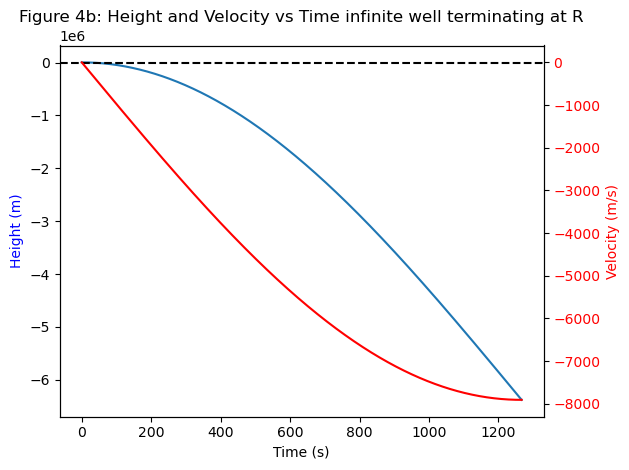

In [11]:
g0 = 9.81
R = 6378.1e3
alpha = 0.004
gamma = 2
d = 4e3
#solve eqn using solve_ivp
#thing 1 derivatives

def derivatives(t,s):
    y, v = s
    r = R - d + y
    dydt = v
    g = g0 * (r / R)
    dvdt = -g
    return [dydt, dvdt]

# thing 2: time span
t0, tf = (0,4000)
t_eval = np.linspace(t0, tf, 10000)
#thing 3: intial conditions
y0 = [d,0]

def hit_bottom(t, s):
    y, v = s
    return s[0] + R
hit_bottom.terminal = True
hit_bottom.direction = -1

#solve
soln = solve_ivp(fun = derivatives, t_span = (t0, tf), y0 = y0, t_eval = t_eval, events=hit_bottom)
print(soln)

#plot
t = soln.t
y = soln.y[0]
v = soln.y[1]

fig, ax = plt.subplots(1,)

ax.plot(t, y, label="Height")
ax.set_ylabel("Height (m)", color="blue")
ax.set_xlabel("Time (s)")
ax2 = ax.twinx()
ax2.plot(t, v, color = "red", label="Velocity")
ax2.set_ylabel("Velocity (m/s)", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax.set_title("Figure 4b: Height and Velocity vs Time infinite well terminating at R")
ax.axhline(0.0, linestyle="--", color='black')
fig.tight_layout()
print('Velocity decreases expontielly and position is increasing in the downward direction') 

In [12]:
G = 6.6743e-11
M = 5.972e24
R = 6378.1e3
v = np.sqrt(G*M/R)
print(v)
t = R/v
print(t)
print("The difference in the times using the orbital orbit equation and the time calculated with the diffrential equation was about 400 s. The orbital equation gave 806 s for fall time and the differential equation gave 1.2e3 s for the fall time.")

7905.277129890415
806.8154847960927
The difference in the times using the orbital orbit equation and the time calculated with the diffrential equation was about 400 s. The orbital equation gave 806 s for fall time and the differential equation gave 1.2e3 s for the fall time.


**Part 5**

Text(0.5, 1.0, 'Figure 5: Density vs Distance from Earth')

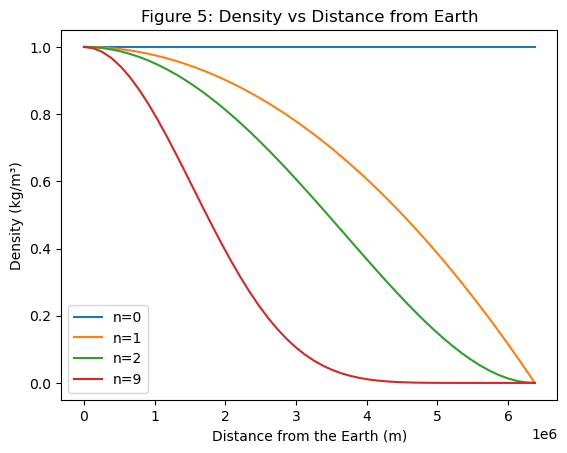

In [13]:
R = 6378.1e3
def density_profile(pn, r, n):
    p = pn*(1 - r**2/R**2)**n
    return p

r = np.linspace(1e3, R)
density_values0 = density_profile(1, r, 0)
density_values1 = density_profile(1, r, 1)
density_values2 = density_profile(1, r, 2)
density_values9 = density_profile(1, r, 9)

fig, ax = plt.subplots(1,)

ax.plot(r, density_values0, label="n=0")
ax.plot(r, density_values1, label="n=1")
ax.plot(r, density_values2, label="n=2")
ax.plot(r, density_values9, label="n=9")
ax.set_xlabel("Distance from the Earth (m)")
ax.set_ylabel("Density (kg/m³)")
ax.legend()
ax.set_title("Figure 5: Density vs Distance from Earth")

Text(0.5, 1.0, 'Figure 6: Force vs Distance from Earth')

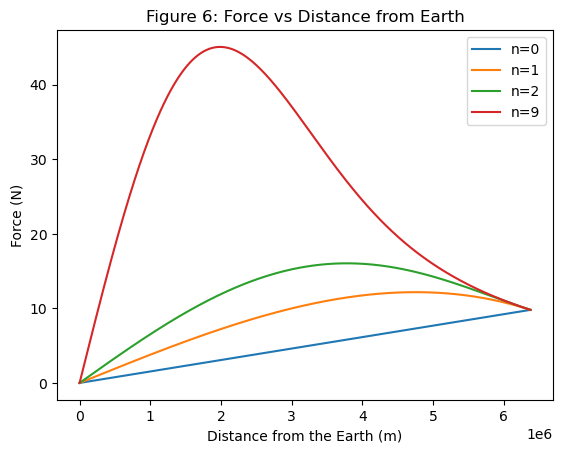

In [14]:
from scipy.integrate import quad

R = 6378.1e3  
M = 5.972e24 
G = 6.67430e-11  

def Force(n, r):
    def integrand_pn(r_val):
        return (1 - r_val**2 / R**2)**n * r_val**2
    integral_val, _ = quad(integrand_pn, 0, R)
    pn = M / (4 * np.pi * integral_val)
    def mass_density(r_val):
        return 4 * np.pi * pn * (1 - r_val**2 / R**2)**n * r_val**2
    if r <= R:
        enclosed_mass, _ = quad(mass_density, 0, r)
    else:
        enclosed_mass = M
    if np.isclose(r, 0):
        return 0
    return G * enclosed_mass / r**2

r_vals = np.linspace(0, R, 500)

Force0 = [Force(0, ri) for ri in r_vals]
Force1 = [Force(1, ri) for ri in r_vals]
Force2 = [Force(2, ri) for ri in r_vals]
Force9 = [Force(9, ri) for ri in r_vals]


fig, ax = plt.subplots(1,)

ax.plot(r_vals, Force0, label="n=0")
ax.plot(r_vals, Force1, label="n=1")
ax.plot(r_vals, Force2, label="n=2")
ax.plot(r_vals, Force9, label="n=9")
ax.set_xlabel("Distance from the Earth (m)")
ax.set_ylabel("Force (N)")
ax.legend()
ax.set_title("Figure 6: Force vs Distance from Earth")

In [23]:
r_array = np.linspace(1e3, 2*R, 90000)

def derivatives(t,s, n, r):
    y, v = s
    r = R - d + y
    dydt = v
    dvdt = -Force(n,r)
    return [dydt, dvdt]

# thing 2: time span
t0, tf = (0,30000)
t_eval = np.linspace(t0, tf, 90000)
#thing 3: intial conditions
y0 = [d,0]

def stopping(t, s, *args):
    return s[0] + R

stopping.terminal = False
stopping.direction = 0

#solve
soln0 = solve_ivp(fun = derivatives, t_span = (t0, tf), y0 = y0, t_eval = t_eval, args=(0, r_array), events=stopping)
soln1 = solve_ivp(fun = derivatives, t_span = (t0, tf), y0 = y0, t_eval = t_eval, args=(1, r_array), events=stopping)
soln2 = solve_ivp(fun = derivatives, t_span = (t0, tf), y0 = y0, t_eval = t_eval, args=(2, r_array), events=stopping)
soln9 = solve_ivp(fun = derivatives, t_span = (t0, tf), y0 = y0, t_eval = t_eval, args=(9, r_array),events=stopping)
#print(soln0, soln1, soln2, soln9)
print("Fall time to center of the earth n=0 is 1.3e3 seconds with a velocity of -7.9e3 m/s")
print("Fall time to center of the earth n=1 is 1.1e3 seconds with a velocity of -1.05e3 m/s")
print("Fall time to center of the earth n=2 is 1.04e3 seconds with a velocity of -1.2e3 m/s")
print("Fall time to center of the earth n=9 is 9.4e2 seconds with a velocity of -1.8 m/s")

Fall time to center of the earth n=0 is 1.3e3 seconds with a velocity of -7.9e3 m/s
Fall time to center of the earth n=1 is 1.1e3 seconds with a velocity of -1.05e3 m/s
Fall time to center of the earth n=2 is 1.04e3 seconds with a velocity of -1.2e3 m/s
Fall time to center of the earth n=9 is 9.4e2 seconds with a velocity of -1.8 m/s


In [16]:
#plot
t0 = soln0.t
y0 = soln0.y[0]
v0 = soln0.y[1]

t1 = soln1.t
y1 = soln1.y[0]
v1 = soln1.y[1]

t2 = soln2.t
y2 = soln2.y[0]
v2 = soln2.y[1]

t9 = soln9.t
y9 = soln9.y[0]
v9 = soln9.y[1]

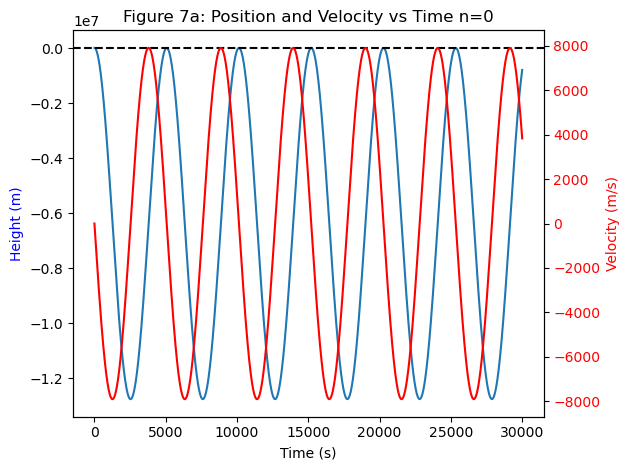

In [17]:
fig, ax = plt.subplots(1,)
ax.plot(t0, y0, label="Height")
ax.set_ylabel("Height (m)", color="blue")
ax.set_xlabel("Time (s)")
ax2 = ax.twinx()
ax2.plot(t0, v0, color = "red", label="Velocity")
ax2.set_ylabel("Velocity (m/s)", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax.set_title("Figure 7a: Position and Velocity vs Time n=0")
ax.axhline(0.0, linestyle="--", color='black')

fig.tight_layout()

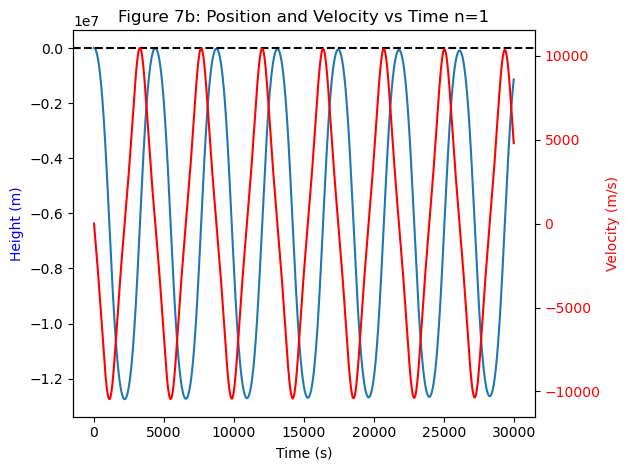

In [18]:
fig, ax = plt.subplots(1,)
ax.plot(t1, y1, label="Height")
ax.set_ylabel("Height (m)", color="blue")
ax.set_xlabel("Time (s)")
ax2 = ax.twinx()
ax2.plot(t1, v1, color = "red", label="Velocity")
ax2.set_ylabel("Velocity (m/s)", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax.set_title("Figure 7b: Position and Velocity vs Time n=1")
ax.axhline(0.0, linestyle="--", color='black')

fig.tight_layout()

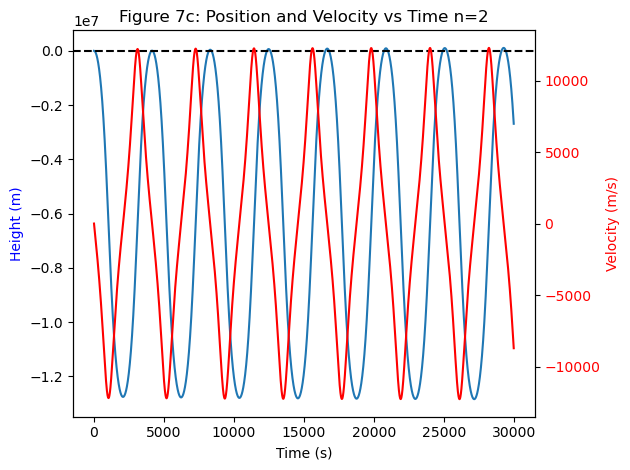

In [19]:
fig, ax = plt.subplots(1,)
ax.plot(t2, y2, label="Height")
ax.set_ylabel("Height (m)", color="blue")
ax.set_xlabel("Time (s)")
ax2 = ax.twinx()
ax2.plot(t2, v2, color = "red", label="Velocity")
ax2.set_ylabel("Velocity (m/s)", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax.set_title("Figure 7c: Position and Velocity vs Time n=2")
ax.axhline(0.0, linestyle="--", color='black')

fig.tight_layout()

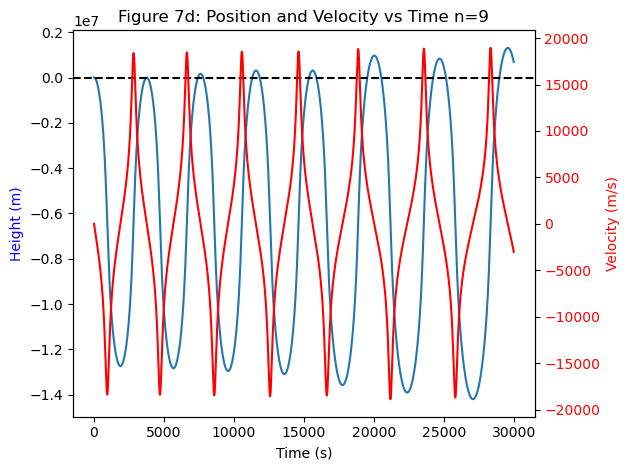

In [20]:
fig, ax = plt.subplots(1,)
ax.plot(t9, y9, label="Height")
ax.set_ylabel("Height (m)", color="blue")
ax.set_xlabel("Time (s)")
ax2 = ax.twinx()
ax2.plot(t9, v9, color = "red", label="Velocity")
ax2.set_ylabel("Velocity (m/s)", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax.set_title("Figure 7d: Position and Velocity vs Time n=9")
ax.axhline(0.0, linestyle="--", color='black')

fig.tight_layout()

**Part 6**

In [21]:
G = 6.6743e-11
Rm = 1738.1e3
Mm = 7.35e22
d = 4e3
M = 5.972e24
R = 6378.1e3
#solve eqn using solve_ivp
#thing 1 derivatives

def derivatives(t,s):
    y, v = s
    r = Rm - d + y
    dydt = v
    dvdt = -G*Mm*r/Rm**3
    return [dydt, dvdt]

# thing 2: time span
t0, tf = (0,50000)
t_eval = np.linspace(t0, tf, 9000)
#thing 3: intial conditions
y0 = [d,0]

def hit_center(t, s):
    y, v = s
    r = Rm - d + y
    return r
    
hit_center.terminal = True
hit_center.direction = -1

#solve
soln = solve_ivp(fun = derivatives, t_span = (t0, tf), y0 = y0, t_eval = t_eval, events=hit_center)
print(soln)
print("Travel time to the center of the moon is 1.622e3 s")
Dens_Earth = M/((4/3)*np.pi*R**3)
Dens_Moon = Mm/((4/3)*np.pi*Rm**3)
Density_ratio = Dens_Moon/Dens_Earth
print("Earth Density:", Dens_Earth, "Moon Density:", Dens_Moon, "Density Ratio:", Density_ratio)
Tfall_e = 1.267e+03
Tfall_m = 1.622e3
time_ratio = Tfall_m/Tfall_e
print(time_ratio)
square_root = (Density_ratio)**-.5
print(square_root)
print("The relationship between fall time and density ratio is that fall time is porportional to density ratio**-.5")

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  5.556e+00 ...  1.617e+03  1.622e+03]
        y: [[ 4.000e+03  3.975e+03 ... -1.721e+06 -1.730e+06]
            [ 0.000e+00 -9.022e+00 ... -1.680e+03 -1.680e+03]]
      sol: None
 t_events: [array([ 1.625e+03])]
 y_events: [array([[-1.734e+06, -1.680e+03]])]
     nfev: 56
     njev: 0
      nlu: 0
Travel time to the center of the moon is 1.622e3 s
Earth Density: 5494.867409551201 Moon Density: 3341.7538038703183 Density Ratio: 0.6081591337511927
1.2801894238358327
1.282305140207845
The relationship between fall time and density ratio is that fall time is porportional to density ratio**-.5
